# 1124作业
> 作业：从课程资源下载数据集"2021.11.24 datasets.7z"，读取'../datasets/Muller_p122_circle.csv'里的点，用2/3的样本点作为训练集，1/3为测试集，
> - 画出训练集$k=3$的决策边界
> - 求出测试集合的正确检测率

## 库、函数准备

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

from numpy.linalg import norm

def kNN(train,test,k):
    num=0
    # 需要加个权重，即以[xmax-xin,ymax-ymin,...]稀释。
    adjustvector=np.max(train[:,[0,1]],axis=0)-np.min(train[:,[0,1]],axis=0)
    dis=np.fromiter(map(lambda i:norm((train[i,[0,1]]-test)/adjustvector),range(len(train))),dtype=np.float32)
    st=np.argsort(dis)
    for j in range(k):
        num=num+train[st[j],2]
    if num<k/2:
        return 0
    return 1

## 数据准备

In [107]:
k=3

df=pd.read_csv('../datasets/Muller_p122_circle.csv')
tr=df.to_numpy()

trnnum=len(tr)*2//3
tstnum=len(tr)-trnnum
trn=tr[0:trnnum]
trndf=df[0:trnnum]

xx=np.linspace(-1.5,1.5,35)
yy=np.linspace(-1.5,1.2,25)

n=np.asarray(list(itertools.product(xx,yy)))

one=trndf.loc[trndf.cls==1]
zero=trndf.loc[trndf.cls==0]
One=df.loc[df.cls==1]
Zero=df.loc[df.cls==0]

## 第一小题，作出边界

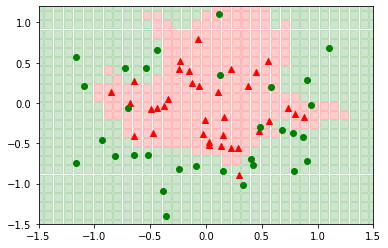

In [108]:
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.2)
# 0 for green, 1 for red
for i in range(len(n)):
    if kNN(trn,n[i],k)==0:
        plt.scatter(n[i,0],n[i,1],marker='s',c='g',alpha=.2,s=80)
    else:
        plt.scatter(n[i,0],n[i,1],marker='s',c='r',alpha=.2,s=80)

plt.scatter(one.x,one.y,marker='^',c='r')
plt.scatter(zero.x,zero.y,marker='o',c='g')
# plt.axis('equal')
plt.show()

## 第二小题，验证并计算准确率

In [109]:
rlt=np.array([])
for u in range(tstnum):
    rlt=np.append(rlt,[kNN(trn,tr[trnnum+u,[0,1]],k)])

correct_percentage=1-np.count_nonzero(rlt-tr[trnnum:,2])/tstnum

d = {'predict':rlt.astype(int),'real':tr[trnnum:,2].astype(int)}
print(pd.DataFrame(data=d))

print("准确率是{:.4%}".format(correct_percentage))

    predict  real
0         1     0
1         1     1
2         1     0
3         1     1
4         1     1
5         0     0
6         1     1
7         1     1
8         0     0
9         1     1
10        1     0
11        1     1
12        1     1
13        1     0
14        0     0
15        0     0
16        1     0
17        0     0
18        0     0
19        1     1
20        1     0
21        1     0
22        1     1
23        1     1
24        0     0
25        1     0
26        1     1
27        1     1
28        0     0
29        1     1
30        1     0
31        0     1
32        1     0
33        0     0
准确率是67.6471%


## 可视化
三角形：为1的；圆形：为0的

白&蓝色：测试集；红&绿色：训练集

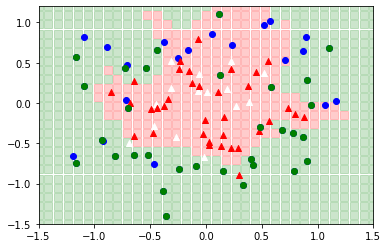

In [111]:
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.2)
# 0 for green, 1 for red
for i in range(len(n)):
    if kNN(trn,n[i],k)==0:
        plt.scatter(n[i,0],n[i,1],marker='s',c='g',alpha=.2,s=80)
    else:
        plt.scatter(n[i,0],n[i,1],marker='s',c='r',alpha=.2,s=80)


plt.scatter(One.x,One.y,marker='^',c='w')
plt.scatter(Zero.x,Zero.y,marker='o',c='b')

plt.scatter(one.x,one.y,marker='^',c='r')
plt.scatter(zero.x,zero.y,marker='o',c='g')
# plt.axis('equal')
plt.show()